In [1]:
!pip install langchain_community
!pip install replicate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.8 MB/s eta 0:00:00


In [2]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
 Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)#

In [11]:
# Define the customer reviews
customer_reviews = [
 "The battery lasts all day, and the performance is excellent.",
 "The screen is too dim outdoors, but I love the colors indoors.",
 "This phone is slow and keeps crashing when I open certain apps."
]
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(customer_reviews)])
prompt = f"""
Classify these reviews as Positive, Negative, or Mixed:
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

1. Positive: The first review expresses satisfaction with the battery life and overall performance, using positive descriptors like "lasts all day" and "excellent."

2. Mixed: The second review points out a flaw (dim screen outdoors) but also highlights a positive aspect (vibrant colors indoors). Therefore, it's classified as mixed.

3. Negative: The third review criticizes the phone for being slow and prone to crashing, indicating a clear dissatisfaction with its functionality. Hence, it is classified as negative.


In [7]:
# Define refined prompt
refined_prompt = f"""
Classify these reviews as positive, negative, or mixed, and tag
relevant categories (battery life, screen quality, or
performance):
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

1. Positive, Performance, Battery Life
- Tags: Positive, Performance, Battery Life
- Explanation: The review expresses satisfaction with both the battery life ("lasts all day") and performance ("excellent").

2. Mixed, Screen Quality
- Tags: Mixed, Screen Quality
- Explanation: The review offers a mixed sentiment. While the reviewer dislikes the screen's dimness outdoors, they appreciate the color quality indoors.

3. Negative, Performance
- Tags: Negative, Performance
- Explanation: The review is negative, citing slow performance and frequent crashes when opening certain apps.


In [10]:
parameters = {
    "top_k": 0,
    'top_p': 1.0,
    "max_tokens": 256,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (256 tokens)",
    "stopping_sequence": None
}

# Invoke the model with the example prompt
response = output.invoke(refined_prompt,parameters=parameters)
# Print the response
print("Granite Model refined Response:\n")
print(response)

Granite Model refined Response:

1. Review 1: Positive, Performance, Battery Life
- This review is positive as the user expresses satisfaction with both the battery life ("lasts all day") and performance ("excellent"). The relevant categories are Performance and Battery Life.

2. Review 2: Mixed, Screen Quality
- This review is mixed because, although the user appreciates the color quality of the screen indoors, they are dissatisfied with its dimness outdoors. The relevant category is Screen Quality.

3. Review 3: Negative, Performance
- This review is negative as the user criticizes the phone's performance ("slow") and mentions frequent crashes when opening certain apps. The relevant category is Performance.


In [15]:
# ================================
# ✅ 1) Install & Import Library
# ================================
!pip install langchain-community pandas

import os
from google.colab import userdata
from langchain_community.llms import Replicate
import pandas as pd

# ================================
# ✅ 2) Set API Token
# ================================
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# ================================
# ✅ 3) Load Dataset
# ================================
# Ensure 'Data_Tanaman_Padi_Sumatera_version_1.csv' is in the same directory
# as this notebook, or provide the correct path to the file.
df = pd.read_csv("Data_Tanaman_Padi_Sumatera_version_1.csv")
df.head()

# ================================
# ✅ 4) Deskripsi Dataset
# ================================
summary = df.describe().to_string()
print(summary)

# ================================
# ✅ 5) Setup LangChain + Granite
# ================================
model_name = "ibm-granite/granite-3.3-8b-instruct"

llm = Replicate(
    model=model_name,
    replicate_api_token=api_token,
)

# ================================
# ✅ 6) Buat Prompt & Jalankan Model
# ================================
prompt = f"""
Saya memiliki data produksi padi di Sumatera dengan ringkasan:
{summary}

Tolong:
1) Analisis hasil data ini secara singkat
2) Berikan insight & temuan pola yang penting
3) Tulis rekomendasi praktis untuk meningkatkan produksi padi

Jawab dengan format:
- Analytical Result
- Insight & Findings
- Recommendations
"""

result = llm.invoke(prompt)

print("=== Hasil Granite ===")
print(result)

             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  Suhu rata-rata
count   224.000000  2.240000e+02     224.000000   224.000000  224.000000      224.000000
mean   2006.500000  1.679701e+06  374349.966920  2452.490759   80.948705       26.801964
std       8.095838  1.161387e+06  232751.161987  1031.972625    4.878680        1.197041
min    1993.000000  4.293800e+04   63142.040000   222.500000   54.200000       22.190000
25%    1999.750000  5.488570e+05  146919.500000  1703.525000   78.975000       26.177500
50%    2006.500000  1.667773e+06  373551.500000  2315.700000   82.375000       26.730000
75%    2013.250000  2.436851e+06  514570.250000  3039.700000   84.000000       27.200000
max    2020.000000  4.881089e+06  872737.000000  5522.000000   90.600000       29.850000
=== Hasil Granite ===
- Analytical Result:

The dataset presents a comprehensive overview of rice production in Sumatera across 224 years, from 1993 to 2020. Key statistical measures include:

1. Mea

In [14]:
from google.colab import files

uploaded = files.upload()


Saving Data_Tanaman_Padi_Sumatera_version_1.csv to Data_Tanaman_Padi_Sumatera_version_1.csv


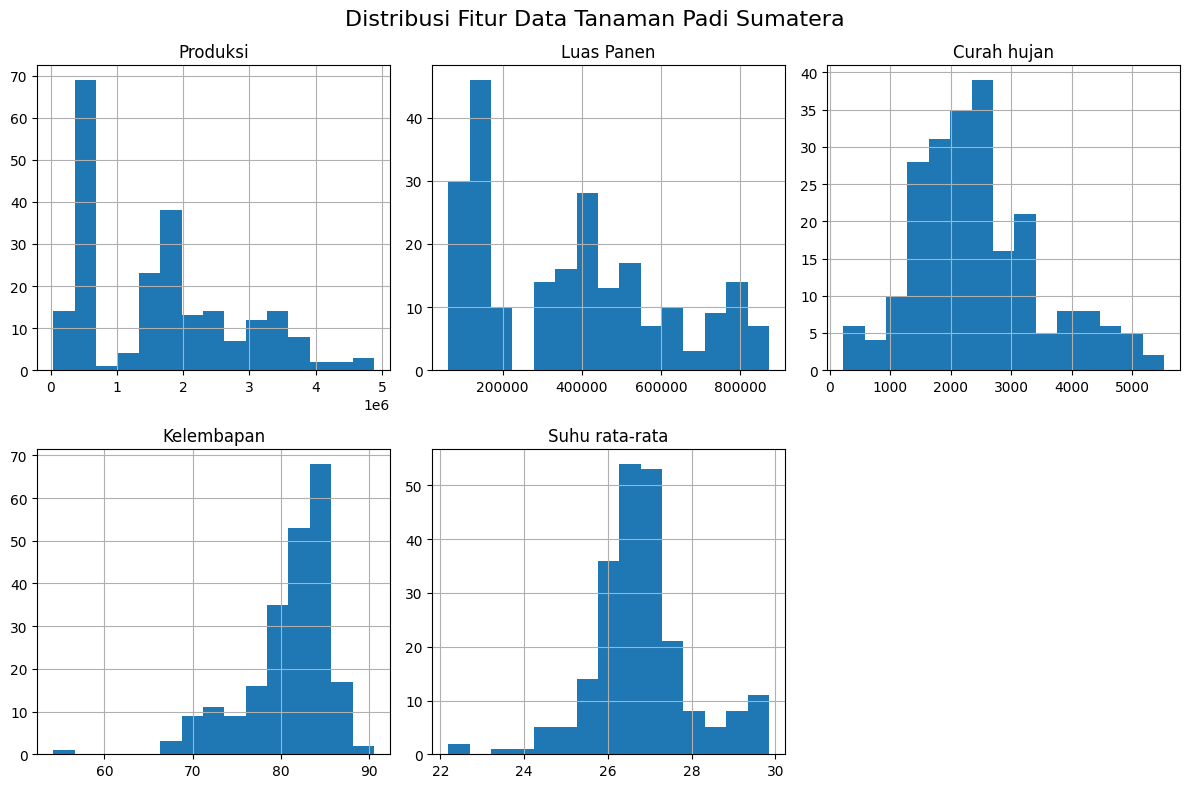

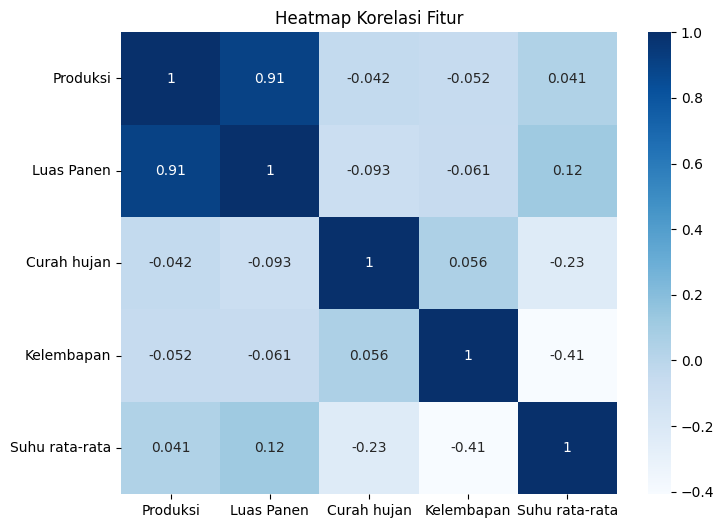

=== Insight Granite ===
Based on the provided summary statistics and your visualizations (histogram for feature distribution and heatmap for variable correlation), here's a more in-depth analysis:

1. **Produksi**: 
   - Mean produksi is around 2006.5 with a standard deviation of 8.09, indicating a relatively stable production over the years.
   - Produksi ranges from 429,800 to 48,810,890, suggesting considerable variation in annual production.
   - A histogram would show a roughly normal distribution, with most years having moderate production, some with low (close to minimum), and a few with very high (close to maximum) production.

2. **Luas Panen**: 
   - The mean area harvested is 1,679,701 with a standard deviation of 1,161,387. This indicates substantial year-to-year variation in the area planted.
   - Luas Panen ranges from 63,142 to 872,737, showing significant fluctuations in the planted area.
   - The histogram would display a wide spread, possibly skewed, with most years h

In [18]:
# ====================================
# ✅ 7) VISUALIZATION + AI Analysis
# ====================================
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Buat Histogram
numeric_cols = ['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']

df[numeric_cols].hist(bins=15, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Distribusi Fitur Data Tanaman Padi Sumatera", fontsize=16)
plt.tight_layout()
plt.show()

# 2️⃣ Buat Heatmap Korelasi
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Heatmap Korelasi Fitur")
plt.show()

# 3️⃣ Buat Prompt Otomatis
prompt_viz = f"""
Berikut adalah ringkasan statistik:
{df.describe().to_string()}

Selain itu, saya sudah membuat visual:
- Histogram distribusi fitur numerik
- Heatmap korelasi antar variabel

Berikan analisis lebih dalam berdasarkan distribusi fitur dan korelasi antar variabel.
Jika perlu, sarankan visual tambahan atau segmentasi data.
"""

# 4️⃣ Kirim ke Granite Model
result_viz = llm.invoke(prompt_viz)

print("=== Insight Granite ===")
print(result_viz)
